# Machine Learning

In machine learning there are many scenarios (supervised, unsupervised, semi-supervised, transductive inference, etc), but the most widely used are supervised learning and unsupervised learning. In this notebook we will try to explain the machine learning for both cases.

## 1. Supervised learning

The supervised learning is the most common scenario associated with classification, regression, and ranking problems. The learner receives a set of labeled examples as traning data and makes prediction for all unseen points [1].

### 1.1. Linear Regression

In [1]:
# common library
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import linear_model

For example in the linear regression model for spring force experiment, <br>
1) We put weight $F_s$ as a mass $m$ on the string, and vary the weight <br>
2) We measure the distance $x$ after forces was given <br>
3) Analyze the data based on the Hook's Law <br>
the experiment will look like the figure below

<img src="images/spring.png" alt="spring" height="600" width="200">

$$F_s = - k x$$ 

In [2]:
# the experiment will have data as follow

m = np.arange(0,1.1,0.1) # mass in kg
g = 9.8 #gravity (m/s^2)
Fs = np.dot(m, g) # Force in N


# after we varied the force we obtained the distance for each variation of force
x = np.array([0, 0.02, 0.04, 0.06, 0.09, 0.1, 0.13, 0.15, 0.17, 0.20, 0.22 ]) #distance in meter

In [3]:
# save the data into a table
data = pd.DataFrame({'Fs': Fs, 'x': x})

In [4]:
data

,Fs,x
0,0.00,0.00
1,0.98,0.02
2,1.96,0.04
3,2.94,0.06
4,3.92,0.09
5,4.90,0.10
6,5.88,0.13
7,6.86,0.15
8,7.84,0.17
9,8.82,0.20


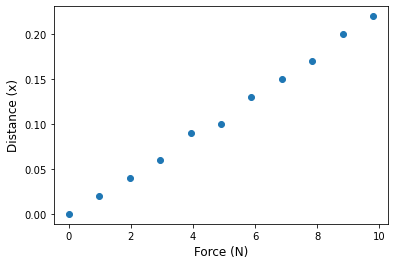

In [5]:
# We plot the data into a graphic
plt.xlabel('Force (N)', fontsize = 12)
plt.ylabel('Distance (x)', fontsize = 12)
plt.scatter(data.Fs, data.x)
plt.show()

The figure above shows that we have 11 data points. By using linear regression methods we can learn and make prediction for other points (supervised learning).

The linear regression model follow this equation:
$$y = sx + c$$
where $x$ is independent variable given, $y$ is dependant variable that we want to search, $s$ is the slope, and $c$ is intercept<br>
For the experiment, the equation for Hook's Law will be slightly change, <br>
$$x =-\frac{1}{k} F_s $$

In [6]:
# Apply the linear regression method
reg = linear_model.LinearRegression()
reg.fit(data[['Fs']], data['x'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# gradient
print("s = "+ "%.2f" %reg.coef_[0], "m/N")


s = 0.02 m/N


In [8]:
# spring constant in N/m 
k = -(1/reg.coef_)
print("k = "+ "%.2f" %k[0], 'N/m')

k = -44.36 N/m


In [9]:
# Try to check the prediction
print("%.2f" %reg.predict([[4.5]])[0], "meter") # predict the distance for 4.5 N

0.10 meter


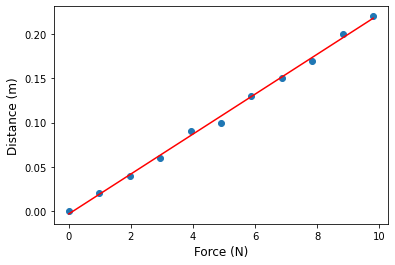

In [10]:
# ploting the linear regression model
plt.xlabel('Force (N)', fontsize = 12)
plt.ylabel('Distance (m)', fontsize = 12)
plt.scatter(data.Fs, data.x)

plt.plot(data.Fs, reg.predict(data[["Fs"]]) , color='red')

plt.show()

#### Reference 
[1] M. Mohri, A. Rostamizadeh, and A. Talwalkar, "Foundations of Machine Learning", <i>The MIT Press Cambridge</i>, 2012.